This notebook explores the raw datasets through its metadata in order to find the right the right patients to be preprocessed

In [1]:
import pandas as pd
import numpy as np

In [2]:
clinical_data = pd.read_csv("./data/clinical_annotations.tsv", sep='\t')

In [74]:
new_clinical_data = pd.read_csv("./data/PDC_clinical_manifest_07042024_120812.csv")

Let's see the class counts from the clinical annotations

In [69]:
new_clinical_data["Tumor Grade"].value_counts()

Tumor Grade
G2              145
Not Reported    104
G3               40
G1               13
G4                1
Name: count, dtype: int64

In [5]:
new_clinical_data.loc[new_clinical_data["Tumor Grade"]=="G1"]["Cases Submitter ID"]

13     C3L-03632
61     C3L-00622
116    C3L-00599
118    C3N-02754
141    C3L-00928
164    C3L-00622
182    C3N-02971
190    C3L-03394
219    C3L-00599
230    C3N-02295
266    C3L-02604
269    C3L-03632
295    C3N-03190
Name: Cases Submitter ID, dtype: object

In [7]:
new_clinical_data["Tumor Grade"].value_counts()

Tumor Grade
G2              145
Not Reported    104
G3               40
G1               13
G4                1
Name: count, dtype: int64

In [3]:
clinical_data["tumor_grade"].value_counts()

tumor_grade
G2              614
G3              294
Not Reported    176
G1              151
GX               26
G4               26
'--              22
Unknown           4
High Grade        1
Name: count, dtype: int64

In [9]:
#Sample 57 patients from new_clinical annotations
g1_patients = new_clinical_data.loc[new_clinical_data["Tumor Grade"] == "G1"]["Cases Submitter ID"]
g2_patients = new_clinical_data.loc[new_clinical_data["Tumor Grade"] == "G2"]["Cases Submitter ID"]
g3_patients = new_clinical_data.loc[new_clinical_data["Tumor Grade"] == "G3"]["Cases Submitter ID"]


selected_g1_patients = g1_patients.sample(n=13, replace = False)
selected_g2_patients = g2_patients.sample(n=22, replace = False)
selected_g3_patients = g3_patients.sample(n=22, replace = False)


Here I try to match the patients for which I have segmentations available (reference patients) with the annotations

In [ ]:

reference_patients = pd.read_csv("data/Metadata_Report_CPTAC-PDA_2023_07_14.csv")
reference_patients = reference_patients[reference_patients["Annotation Type"]=="Segmentation"]["PatientID"]

#print(reference_patients)

g1_patients = set(clinical_data.loc[clinical_data["tumor_grade"] == "G1"]["case_submitter_id"])
print(len(reference_patients[reference_patients.isin(g1_patients)])) #Only 5 patients with clinical annotations with g1 cancer grade 
#selected_g1_patients = g1_patients[g1_patients.isin(reference_patients)].sample(n=5, replace = False)

g2_patients = set(clinical_data.loc[clinical_data["tumor_grade"] == "G2"]["case_submitter_id"])
print(len(reference_patients[reference_patients.isin(g2_patients)]))

#selected_g2_patients = g2_patients[g2_patients.isin(reference_patients)].sample(n=33, replace = False)

g3_patients = set(clinical_data.loc[clinical_data["tumor_grade"] == "G3"]["case_submitter_id"])
print(len(reference_patients[reference_patients.isin(g3_patients)]))

#selected_g3_patients = g3_patients[g3_patients.isin(reference_patients)].sample(n=19, replace = False)

16
135
43


In [12]:
#Sample 57 patients with balanced labels
#clinical_data = pd.read_csv("./data/CPTACPDAclinical.csv")
clinical_data = pd.read_csv("./data/clinical_annotations.tsv", sep='\t')
reference_patients = pd.read_csv("data/Metadata_Report_CPTAC-PDA_2023_07_14.csv")
reference_patients = set(reference_patients[reference_patients["Annotation Type"]=="Segmentation"]["PatientID"])

#print(reference_patients)

g1_patients = clinical_data.loc[clinical_data["tumor_grade"] == "G1"]["case_submitter_id"]
print(len(g1_patients[g1_patients.isin(reference_patients)])) #Only 5 patients with clinical annotations with g1 cancer grade 
g1_annotated = set(g1_patients) & reference_patients #intersection between reference patients and g1_patients
print(len(g1_annotated))
#selected_g1_patients = g1_patients[g1_patients.isin(reference_patients)].sample(n=5, replace = False)

g2_patients = clinical_data.loc[clinical_data["tumor_grade"] == "G2"]["case_submitter_id"]
print(len(g2_patients[g2_patients.isin(reference_patients)]))
g2_annotated = set(g2_patients) & reference_patients
print(len(g2_annotated))
#selected_g2_patients = g2_patients[g2_patients.isin(reference_patients)].sample(n=33, replace = False)

g3_patients = clinical_data.loc[clinical_data["tumor_grade"] == "G3"]["case_submitter_id"]
print(len(g3_patients[g3_patients.isin(reference_patients)]))
g3_annotated = set(g3_patients) & reference_patients
print(len(g3_annotated))
#selected_g3_patients = g3_patients[g3_patients.isin(reference_patients)].sample(n=19, replace = False)

5
5
47
47
19
19


In [10]:
ct_patients = pd.read_csv("data/metadata_annotations/Metadata_Report_CPTAC-PDA_2023_07_14.csv")

In [2]:
clinical_data_list = [
    pd.read_csv("./data/metadata_annotations/CPTACPDAclinicalSerumGlycoproteome.csv"), 
    pd.read_csv("./data/metadata_annotations/clinical_annotations.tsv", sep="\t").rename(columns={"tumor_grade":"Tumor Grade","case_submitter_id":"Case Submitter ID","days_to_death":"Days to Death","days_to_last_follow_up":"Days to Last Follow Up","vital_status": "Vital Status"}), 
    pd.read_csv("./data/metadata_annotations/CPTAC2clinical.tsv", sep="\t").rename(columns={"tumor_grade":"Tumor Grade","case_submitter_id":"Case Submitter ID","days_to_death": "Days to Death","days_to_last_follow_up":"Days to Last Follow Up","vital_status":"Vital Status"}),
    pd.read_csv("./data/metadata_annotations/CPTACPDAclinical.csv"), 
    pd.read_csv("./data/metadata_annotations/CPTACPDAclinicalDIAProteome.csv"), 
    pd.read_csv("./data/metadata_annotations/CPTACPDAclinicalBioTextProteome.csv"), 
    pd.read_csv("./data/metadata_annotations/CPTACPDAclinicalSerumProteome.csv")
    ]

In [3]:
np.unique(clinical_data_list[0]["Days to Last Follow Up"].values)

array([' ', '1007.00', '1024.00', '1036.00', '1041.00', '1099.00',
       '1198.00', '1262.00', '1352.00', '1463.00', '1481.00', '1590.00',
       '1747.00', '1777.00', '1798.00', '1805.00', '190.00', '196.00',
       '246.00', '251.00', '261.00', '287.00', '288.00', '290.00',
       '344.00', '376.00', '422.00', '550.00', '588.00', '594.00',
       '596.00', '631.00', '723.00', '78.00', '854.00', '881.00'],
      dtype=object)

In [4]:
#clinical_data = pd.read_csv("data/metadata_annotations/clinical_annotations.tsv", sep="\t")
clinical_data_concat = pd.concat(clinical_data_list)[["Case Submitter ID","Days to Last Follow Up", "Days to Death", "Vital Status"]]

In [5]:
np.unique(clinical_data_concat["Days to Death"].values)

array([' ', "'--", '-1', '-6', '-9', '0', '1', '1002', '1006', '1007',
       '1009', '102', '1022', '1023', '1025', '1027', '1028', '1035',
       '1036', '1039', '1041', '1045', '1046', '1047', '1053', '1063',
       '1065', '1072', '1076', '108', '109', '1099', '11', '110', '1102',
       '1105', '111', '1115', '1135', '1142', '1152', '116', '1165',
       '1170', '1175', '1177', '118', '1189', '1192', '1198', '1209',
       '121', '1210', '1213', '1224', '1225', '1229', '123', '1230',
       '1235', '1239', '126', '1262', '1267', '1268', '127', '1281',
       '129', '1290', '1305', '1333', '1338', '134', '1351', '1352',
       '1359', '1363', '1387', '1388', '139', '1396', '140', '1407',
       '142', '1421', '1427', '143', '1436', '1439', '145', '1463', '147',
       '1481', '1509', '153', '1534', '1537', '155', '1557', '1573',
       '1578', '158', '1584', '1590', '162', '1623', '1637', '164',
       '1642', '1653', '1659', '1687', '1703', '1726', '1729', '1747',
       '175', '1

In [11]:
ct_ids= set(ct_patients["PatientID"].unique())

In [9]:
clinical_ids = []
for clinical_data in clinical_data_list:
    clinical_ids.extend(clinical_data["Case Submitter ID"].unique())
#clinical_ids = set(clinical_data["case_submitter_id"].unique())

In [10]:
clinical_ids = set(clinical_ids)

In [11]:
import os
isto_ids = set([ file.split("-")[0]+"-"+file.split("-")[1] for file in os.listdir("../CPTAC_PDA")])

In [12]:
len(isto_ids)

167

In [13]:
len(clinical_ids & isto_ids)

159

In [14]:
len(ct_ids & isto_ids)

77

In [15]:
len(ct_ids.union(isto_ids))

193

In [16]:
len(ct_ids & isto_ids)

77

In [17]:
len(clinical_ids & (ct_ids & isto_ids))

75

In [32]:
print("\n".join(clinical_ids & (ct_ids.union(isto_ids))))

C3L-02109
C3L-00640
C3N-01166
C3L-01124
C3L-03629
C3L-01160
C3N-01502
C3L-01662
C3L-01037
C3N-01900
C3L-05754
C3N-00954
C3L-05746
C3L-02610
C3N-01907
C3L-01052
C3N-03173
C3N-01011
C3N-03000
C3N-01388
C3L-01054
C3N-02768
C3N-03780
C3L-00102
C3N-00198
C3L-01051
C3L-01971
C3N-02940
C3N-00436
C3N-02591
C3N-01715
C3N-01012
C3L-00819
C3L-01328
C3L-00277
C3L-05752
C3N-03006
C3L-05744
C3N-00516
C3L-02604
C3L-02701
C3N-03069
C3L-05750
C3N-04283
C3L-03129
C3L-00401
C3N-01167
C3N-03754
C3N-03884
C3N-03426
C3N-01897
C3N-02010
C3L-05748
C3N-02997
C3N-01381
C3L-03348
C3N-02069
C3N-03665
C3N-03190
C3N-01383
C3N-02573
C3N-01380
C3L-03388
C3L-03350
C3L-02463
C3L-01158
C3L-01053
C3N-03666
C3L-04473
C3N-03007
C3L-03356
C3L-03630
C3L-01031
C3L-01598
C3L-00625
C3N-00249
C3L-02112
C3L-00598
C3L-05043
C3N-02590
C3N-01168
C3L-02890
C3L-03126
C3N-01997
C3N-03039
C3L-03635
C3N-02944
C3N-01719
C3N-03670
C3N-02295
C3L-03371
C3L-05053
C3L-01687
C3L-03394
C3L-04027
C3L-00017
C3L-02899
C3N-00957
C3N-02998
C3L-02116


In [15]:
print("\n".join(clinical_ids & (ct_ids)))

C3L-02109
C3L-03629
C3N-01166
C3N-01502
C3N-01900
C3L-05754
C3L-02610
C3L-05746
C3N-01907
C3N-03000
C3N-00198
C3N-01715
C3N-01012
C3L-05752
C3N-03006
C3L-05744
C3L-05750
C3L-03129
C3L-00401
C3N-01167
C3N-03754
C3N-03426
C3N-01897
C3L-05748
C3N-02010
C3N-02997
C3N-01381
C3L-03348
C3N-01383
C3L-03350
C3N-03007
C3L-03356
C3L-00625
C3N-00249
C3L-02112
C3L-00598
C3L-05043
C3L-02890
C3L-03126
C3N-03039
C3N-03670
C3N-02295
C3L-05053
C3L-01687
C3N-02998
C3N-00957
C3L-02116
C3L-02115
C3N-01382
C3N-00512
C3L-04853
C3L-02888
C3L-04475
C3L-00599
C3N-03430
C3L-01032
C3L-03624
C3L-04479
C3N-00302
C3N-02971
C3L-00189
C3N-00514
C3L-01703
C3L-02118
C3L-00395
C3N-02592
C3L-03639
C3N-01165
C3L-04848
C3L-01036
C3L-05056
C3L-01702
C3L-03622
C3L-03743
C3N-00511
C3L-04495
C3L-03123
C3L-02613
C3L-05049
C3N-00303
C3L-00622
C3L-03632
C3L-05745
C3N-01716
C3L-02606
C3N-00518
C3N-01375
C3L-05121
C3N-00513
C3L-01689
C3L-05057
C3L-03628
C3N-01714


In [56]:
print("\n".join(clinical_ids & (isto_ids)))

C3L-03356
C3L-00589
C3N-03440
C3N-01714
C3L-01637
C3N-01383
C3N-01900
C3L-00598
C3L-00881
C3N-04119
C3L-04080
C3N-03840
C3L-03635
C3N-03007
C3L-03632
C3L-00189
C3N-00303
C3L-02606
C3N-02998
C3L-00819
C3N-03439
C3N-02590
C3N-01997
C3L-01036
C3N-02592
C3N-00709
C3L-03639
C3N-03670
C3N-02069
C3L-01037
C3N-03853
C3L-00640
C3N-02591
C3L-01124
C3L-04475
C3N-02589
C3N-00516
C3N-01168
C3N-03006
C3L-01031
C3L-01051
C3N-04283
C3N-02579
C3N-03069
C3L-00928
C3L-03388
C3L-02463
C3N-03778
C3N-01388
C3L-02112
C3L-01689
C3L-00625
C3N-01012
C3L-04848
C3L-04479
C3L-03123
C3L-03743
C3L-01053
C3L-01160
C3L-01453
C3N-02971
C3N-03754
C3N-03173
C3N-00302
C3L-03395
C3N-00249
C3N-04284
C3N-02768
C3L-04027
C3L-01687
C3N-01719
C3L-00401
C3L-02116
C3L-03630
C3L-01971
C3N-02585
C3L-02610
C3N-03190
C3N-00512
C3L-02109
C3N-01011
C3N-03428
C3N-03666
C3L-03350
C3N-03430
C3N-01381
C3L-00277
C3L-02897
C3N-03039
C3N-02997
C3L-01598
C3N-03086
C3L-00622
C3N-00957
C3L-00017
C3L-03394
C3L-01052
C3N-03665
C3N-01715
C3N-01379


In [22]:
# Get series instance uids of ct patients with clinical labels
uids = pd.read_csv("../cptac_pda_xlsx.csv")
#print(uids.keys())
study_instance_uids = []
for ct_patient_id in clinical_ids & ct_ids:
    study_instance_uids.extend(uids[uids["Patient ID"]==ct_patient_id]["Study Instance UID"].to_list())

print("\n".join(study_instance_uids)) 

 1.3.6.1.4.1.14519.5.2.1.1078.3273.130113248071038569453092354727
 1.3.6.1.4.1.14519.5.2.1.1078.3273.328908073663398961712694980553
 1.3.6.1.4.1.14519.5.2.1.1078.3273.324909977949421847397309520591
 1.3.6.1.4.1.14519.5.2.1.1078.3707.778675239432037760027136806795
 1.3.6.1.4.1.14519.5.2.1.1078.3707.170952835567616439172864119879
 1.3.6.1.4.1.14519.5.2.1.1078.3707.624991598514211691851890725796
 1.3.6.1.4.1.14519.5.2.1.1078.3707.543081410674795318152465338041
 1.3.6.1.4.1.14519.5.2.1.1078.3707.298588252622110727849045680181
 1.3.6.1.4.1.14519.5.2.1.1078.3707.163862166226831707664472845138
 1.3.6.1.4.1.14519.5.2.1.1078.3707.494337098011956979203059006136
 1.3.6.1.4.1.14519.5.2.1.1078.3707.603536113820787279131720909442
 1.3.6.1.4.1.14519.5.2.1.1078.3707.736331078400850231102881145325
 1.3.6.1.4.1.14519.5.2.1.1078.3707.290527642973048522344864809162
 1.3.6.1.4.1.14519.5.2.1.1078.3273.113765383881296911759312037125
 1.3.6.1.4.1.14519.5.2.1.1078.3273.191071964008918804424232504490
 1.3.6.1.4

In [2]:
pathobench_df = pd.read_csv("../pathobench_cptacpda.tsv", sep="\t")

In [3]:
pathobench_ids = set(np.unique(pathobench_df["case_id"].values))

In [5]:
import os
ct_ids = set(os.listdir("../MedImageInsights/embeddings_output_cptacpda"))

In [14]:
ct_patho_ids = (ct_ids & pathobench_ids)

In [15]:
pathobench_df[pathobench_df["case_id"].isin(ct_patho_ids)].to_csv("pathobench_ct.tsv",sep="\t")

In [24]:
labels_df = pd.read_csv("data/processed/processed_CPTAC_PDA_survival/labels_cptacpda.csv")

In [25]:
labels_ids = set(np.unique(labels_df["PatientID"].values))

In [32]:
print("\n".join(pathobench_ids))

C3L-03123
C3N-02573
C3L-04848
C3L-01328
C3L-00622
C3L-01687
C3L-02610
C3N-00436
C3N-01381
C3N-03000
C3L-03635
C3N-02579
C3N-03439
C3L-01662
C3L-00017
C3L-03743
C3L-00599
C3L-02109
C3L-00625
C3N-01714
C3N-01167
C3N-02589
C3N-00302
C3L-01703
C3N-03007
C3L-02613
C3N-01165
C3N-00516
C3L-03628
C3N-03754
C3L-03639
C3L-02890
C3L-00598
C3N-02944
C3L-00819
C3L-02809
C3L-00102
C3L-01689
C3L-00928
C3N-00514
C3N-01388
C3L-02118
C3N-04282
C3L-01971
C3L-04072
C3N-01383
C3N-00511
C3N-01012
C3L-02463
C3N-02768
C3L-04027
C3L-02604
C3N-00198
C3N-03853
C3L-01598
C3L-03630
C3N-03173
C3N-03061
C3L-03356
C3N-00249
C3L-02116
C3L-04853
C3N-03839
C3N-02585
C3N-01380
C3N-02971
C3N-02010
C3L-01637
C3L-02899
C3N-03426
C3N-04126
C3L-04475
C3L-00589
C3L-02897
C3L-00277
C3N-01716
C3N-02592
C3L-02115
C3L-01124
C3L-02606
C3N-03086
C3N-01375
C3N-03665
C3N-03430
C3N-04119
C3N-03666
C3N-03884
C3N-02940
C3N-01168
C3L-04479
C3L-01037
C3N-03840
C3L-01031
C3L-02701
C3N-03190
C3N-03006
C3N-00518


In [30]:
print("\n".join((labels_ids & pathobench_ids ) & ct_ids))

C3L-03123
C3L-01703
C3N-03007
C3L-02613
C3N-01165
C3L-04848
C3N-02592
C3L-02115
C3L-00622
C3L-01687
C3L-02610
C3L-03628
C3N-03754
C3L-03639
C3L-02890
C3N-01381
C3L-02606
C3N-00198
C3N-03000
C3N-01375
C3L-00598
C3N-03430
C3L-03356
C3N-00249
C3L-02116
C3L-04853
C3L-04479
C3L-01689
C3L-03743
C3L-00599
C3N-02971
C3N-02010
C3L-02109
C3L-00625
C3N-00514
C3N-01714
C3N-01167
C3N-03426
C3L-02118
C3L-04475
C3N-01383
C3N-00511
C3N-03006
C3N-00302
C3N-01012
C3N-00518
C3N-01716


In [23]:
len(pathobench_ids)

97

In [33]:
len(clinical_ids & ct_ids)

93

In [34]:
len((clinical_ids & ct_ids) - set(os.listdir("data/processed/processed_CPTAC_PDA_71_3D/CT")) )

22

In [46]:
print(clinical_ids & (ct_ids & isto_ids))

{'C3L-02116', 'C3N-01907', 'C3L-03356', 'C3N-00512', 'C3L-02610', 'C3N-03006', 'C3N-01714', 'C3L-02109', 'C3N-00513', 'C3N-01383', 'C3L-02118', 'C3N-01900', 'C3L-03624', 'C3L-00598', 'C3N-00198', 'C3L-02112', 'C3L-01689', 'C3L-00625', 'C3N-01012', 'C3L-04848', 'C3L-02115', 'C3N-03007', 'C3L-04479', 'C3L-04495', 'C3L-00395', 'C3L-03628', 'C3L-03123', 'C3L-03632', 'C3L-00189', 'C3L-03350', 'C3N-01382', 'C3N-00303', 'C3N-03430', 'C3N-01381', 'C3N-03426', 'C3L-00599', 'C3L-02606', 'C3N-02998', 'C3L-03743', 'C3N-03039', 'C3N-00514', 'C3N-02295', 'C3L-01702', 'C3N-02997', 'C3N-01375', 'C3N-02010', 'C3N-02971', 'C3N-01166', 'C3N-00518', 'C3N-03754', 'C3L-00622', 'C3N-00957', 'C3L-01032', 'C3N-01165', 'C3L-01036', 'C3N-01897', 'C3N-00302', 'C3N-02592', 'C3N-00249', 'C3N-01715', 'C3N-01167', 'C3L-03639', 'C3N-03670', 'C3N-03000', 'C3N-01502', 'C3L-01687', 'C3L-01703', 'C3L-02613', 'C3N-00511', 'C3L-02890', 'C3L-04475', 'C3L-04853', 'C3L-03129', 'C3L-03126', 'C3L-00401'}


In [69]:
len(clinical_ids & (ct_ids.union(isto_ids)))

177

In [17]:
clinical_data_concat = clinical_data_concat.drop_duplicates(subset="Case Submitter ID")

In [18]:
# Get labels for ct and istologies
labels = clinical_data_concat[clinical_data_concat["Case Submitter ID"].isin(clinical_ids & (ct_ids.union(isto_ids)))]

In [19]:
np.unique(labels["Vital Status"].values)

array([' ', 'Alive', 'Dead', 'Not Reported'], dtype=object)

In [20]:
labels["Days to Death"] = labels["Days to Death"].replace([' ', "'--"], pd.NA)

/tmp/ipykernel_2642290/3530315951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels["Days to Death"] = labels["Days to Death"].replace([' ', "'--"], pd.NA)


In [21]:
labels["Days to Death"] = labels["Days to Death"].fillna(labels["Days to Last Follow Up"])

/tmp/ipykernel_2642290/1582302332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels["Days to Death"] = labels["Days to Death"].fillna(labels["Days to Last Follow Up"])


In [22]:
labels.to_csv("labels_df.csv")

In [23]:
labels["Vital Status"] = labels["Vital Status"].map( lambda x: x!="Dead")

/tmp/ipykernel_2642290/4005056019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels["Vital Status"] = labels["Vital Status"].map( lambda x: x!="Dead")


In [24]:
labels["Vital Status"].values

array([ True, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False,

In [25]:
labels["Days to Death"] = labels["Days to Death"].replace([' ',"'--"], pd.NA)

/tmp/ipykernel_2642290/1191112432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels["Days to Death"] = labels["Days to Death"].replace([' ',"'--"], pd.NA)


In [26]:
labels["Days to Death"] = labels["Days to Death"].replace('', pd.NA)

/tmp/ipykernel_2642290/1698452121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels["Days to Death"] = labels["Days to Death"].replace('', pd.NA)


In [27]:
labels = labels.dropna()

In [121]:
print(labels["Days to Death"].dtype)

object


In [28]:
labels["Days to Death"] = labels["Days to Death"].astype(float)

In [29]:
labels["Days to Death"] = labels["Days to Death"].astype(int)

In [125]:
labels[["Case Submitter ID", "Days to Death", "Vital Status"]].rename({"Case Submitter ID":"PatientID","Days to Death":"T","Vital Status":"C"}).to_csv("labels_cptacpda.csv", index=False)

In [30]:
labels = labels.rename(columns = {"Case Submitter ID":"PatientID","Days to Death":"T","Vital Status":"C"})

In [31]:
labels["C"] = labels["C"].astype(int)

In [32]:
labels

,PatientID,Days to Last Follow Up,T,C
1,C3L-02112,1747.00,1747,0
3,C3L-00625,1198.00,1198,0
4,C3L-04475,881.00,893,0
7,C3L-01689,594.00,594,0
8,C3L-03356,550.00,550,1
...,...,...,...,...
110,C3N-01379,971.00,971,0
158,C3N-01907,407.00,440,0
19,C3N-02069,629.00,788,0
24,C3N-03778,977.00,977,0


In [33]:
!pip install lifelines

  Using cached lifelines-0.30.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached autograd-1.7.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached autograd-gamma-0.5.0.tar.gz (4.0 kB)
  Preparing metadata (setup.py) ... done
  Using cached formulaic-1.1.1-py3-none-any.whl.metadata (6.9 kB)
  Using cached interface_meta-1.3.0-py3-none-any.whl.metadata (6.7 kB)
Using cached lifelines-0.30.0-py3-none-any.whl (349 kB)
Using cached autograd-1.7.0-py3-none-any.whl (52 kB)
Using cached formulaic-1.1.1-py3-none-any.whl (115 kB)
Using cached interface_meta-1.3.0-py3-none-any.whl (14 kB)
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=e97c2b8b79c8cfe9032c85ebf9b3b9fd770007ef47929d4a40b3299ed665c47b
  Stored in directory: /home/users/pietro.caforio/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [34]:
from lifelines import KaplanMeierFitter

In [38]:
kmf = KaplanMeierFitter()

In [39]:
kmf.fit(labels["T"], event_observed=~labels["C"], label= "Kaplan-Meier Estimate")

<lifelines.KaplanMeierFitter:"Kaplan-Meier Estimate", fitted with 158 total observations, 158 right-censored observations>

In [144]:
!pip install matplotlib

In [146]:
!pip show matplotlib

Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /home/users/pietro.caforio/anaconda3/envs/research_biocv_proj/lib/python3.9/site-packages
Requires: contourpy, cycler, fonttools, importlib-resources, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: lifelines, seaborn, staintools, vtk


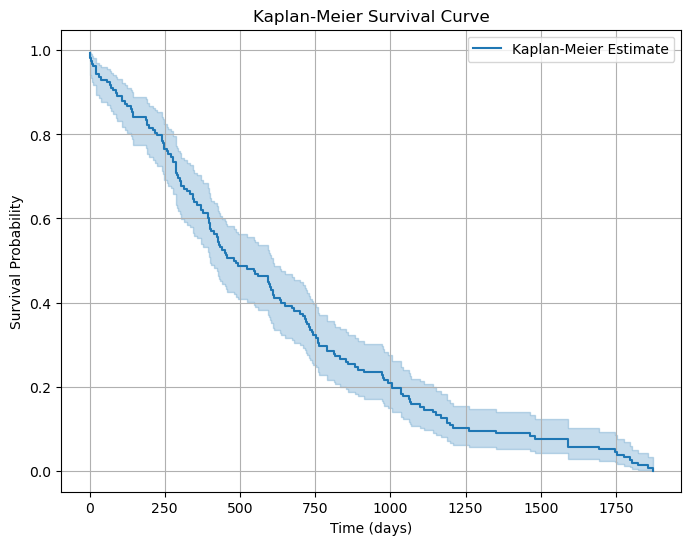

In [40]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
kmf.plot()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.savefig("kaplan-meier_cptacpda.png", dpi=300, bbox_inches='tight')

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

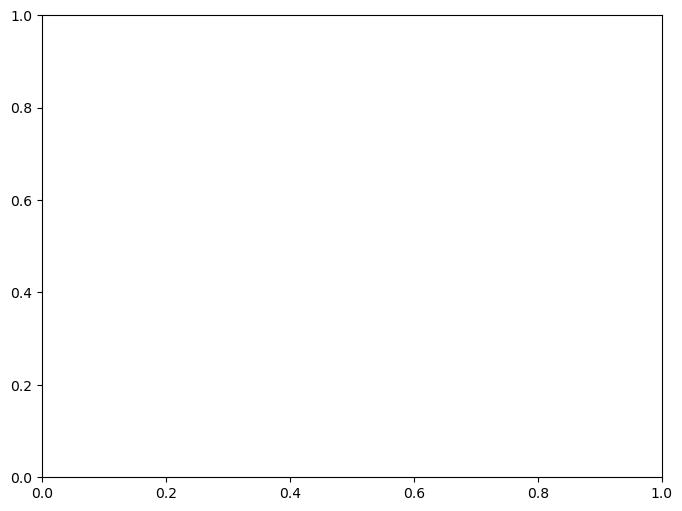

Here I checked if whether combining clinical annotations from multiple sources would result in more patients

In [2]:
clinical_data_list = [
    pd.read_csv("./data/CPTACPDAclinicalSerumGlycoproteome.csv"), 
    pd.read_csv("./data/clinical_annotations.tsv", sep="\t").rename(columns={"tumor_grade":"Tumor Grade","case_submitter_id":"Case Submitter ID"}), 
    pd.read_csv("./data/CPTAC2clinical.tsv", sep="\t").rename(columns={"tumor_grade":"Tumor Grade","case_submitter_id":"Case Submitter ID"}),
    pd.read_csv("./data/CPTACPDAclinical.csv"), 
    pd.read_csv("./data/CPTACPDAclinicalDIAProteome.csv"), 
    pd.read_csv("./data/CPTACPDAclinicalBioTextProteome.csv"), 
    pd.read_csv("./data/CPTACPDAclinicalSerumProteome.csv")
    ]

#clinical_data = pd.read_csv("./data/CPTACUCEC_clinicalannotationsProteom.csv")
#clinical_data1 = pd.read_csv("./data/CPTACUCEC_clinicalIDC.csv")

reference_patients = pd.read_csv("data/Metadata_Report_CPTAC-PDA_2023_07_14.csv")
reference_patients = reference_patients[reference_patients["Annotation Type"]=="Segmentation"]["PatientID"]
#reference_patients_list = reference_patients.to_list()

#print(reference_patients)
g1_patients = []
for clinical_data in clinical_data_list:
    g1_patients.extend(clinical_data.loc[clinical_data["Tumor Grade"] == "G1"]["Case Submitter ID"].to_list()) 
g1_annotated = set(g1_patients) & set(reference_patients) #intersection between reference patients and g1_patients
g1_volumes = reference_patients.loc[reference_patients.isin(g1_patients)]
print(f"g1:{len(g1_annotated)}")
print(f"g1 volumes: {len(g1_volumes)}")
g2_patients = []
for clinical_data in clinical_data_list:
    g2_patients.extend(clinical_data.loc[clinical_data["Tumor Grade"] == "G2"]["Case Submitter ID"].to_list()) 
g2_annotated = set(g2_patients) & set(reference_patients) #intersection between reference patients and g1_patients
g2_volumes = reference_patients.loc[reference_patients.isin(g2_patients)]
print(f"g2:{len(g2_annotated)}")
print(f"g2 volumes: {len(g2_volumes)}")

g3_patients = []
for clinical_data in clinical_data_list:
    g3_patients.extend(clinical_data.loc[clinical_data["Tumor Grade"] == "G3"]["Case Submitter ID"].to_list()) 
g3_volumes = reference_patients.loc[reference_patients.isin(g3_patients)]
g3_annotated = set(g3_patients) & set(reference_patients) #intersection between reference patients and g1_patients
print(f"g3:{len(g3_annotated)}")
print(f"g2 volumes: {len(g3_volumes)}")


g1:5
g1 volumes: 16
g2:53
g2 volumes: 151
g3:19
g2 volumes: 43


In [ ]:
with open("data/sampled_patients.txt", "a") as file:
    file.write(',\n'.join(g1_annotated.astype(str))+',\n')
    file.write(',\n'.join(selected_g2_patients.astype(str))+',\n')
    file.write(',\n'.join(selected_g3_patients.astype(str))+',\n')

## CPTAC UCEC CT

Now I do the same for the CPTAC UCEC dataset

In [17]:
clinical_data = pd.read_csv("./data/CPTACUCEC_clinicalannotationsProteom.csv")

In [80]:
clinical_data["Tumor Grade"].value_counts()

Tumor Grade
G2              68
G1              40
G3              28
Not Reported    21
Unknown          1
High Grade       1
Name: count, dtype: int64

In [18]:
reference_patients = pd.read_csv("data/Metadata_Report_CPTAC-UCEC_2023_07_14.csv")
reference_patients = reference_patients[reference_patients["Annotation Type"]=="Segmentation"]["PatientID"]
#print(reference_patients)

g1_patients = set(clinical_data.loc[clinical_data["Tumor Grade"] == "G1"]["Case Submitter ID"])

print(len(reference_patients[reference_patients.isin(g1_patients)])) #Only 5 patients with clinical annotations with g1 cancer grade 
#selected_g1_patients = g1_patients[g1_patients.isin(reference_patients)].sample(n=5, replace = False)


g2_patients = set(clinical_data.loc[clinical_data["Tumor Grade"] == "G2"]["Case Submitter ID"])
print(len(reference_patients[reference_patients.isin(g2_patients)]))

#selected_g2_patients = g2_patients[g2_patients.isin(reference_patients)].sample(n=33, replace = False)

g3_patients = set(clinical_data.loc[clinical_data["Tumor Grade"] == "G3"]["Case Submitter ID"])
print(len(reference_patients[reference_patients.isin(g3_patients)]))

#selected_g3_patients = g3_patients[g3_patients.isin(reference_patients)].sample(n=19, replace = False)


11
36
24


In [19]:
reference_patients = pd.read_csv("data/Metadata_Report_CPTAC-UCEC_2023_07_14.csv")
reference_patients = reference_patients[reference_patients["Annotation Type"]=="Segmentation"]["PatientID"]
#print(reference_patients)

g1_patients = clinical_data.loc[clinical_data["Tumor Grade"] == "G1"]["Case Submitter ID"]

print(len(g1_patients[g1_patients.isin(reference_patients)])) #Only 5 patients with clinical annotations with g1 cancer grade 
#selected_g1_patients = g1_patients[g1_patients.isin(reference_patients)].sample(n=5, replace = False)


g2_patients = clinical_data.loc[clinical_data["Tumor Grade"] == "G2"]["Case Submitter ID"]
print(len(g2_patients[g2_patients.isin(reference_patients)]))

#selected_g2_patients = g2_patients[g2_patients.isin(reference_patients)].sample(n=33, replace = False)

g3_patients = clinical_data.loc[clinical_data["Tumor Grade"] == "G3"]["Case Submitter ID"]
print(len(g3_patients[g3_patients.isin(reference_patients)]))

#selected_g3_patients = g3_patients[g3_patients.isin(reference_patients)].sample(n=19, replace = False)


4
10
8


Combining multiple clinical annotations results in a good amount of patients

In [3]:
clinical_data_list = [
    pd.read_csv("./data/CPTACUCEC_clinicalannotationsProteom.csv"),
    pd.read_csv("./data/CPTACUCEC_clinicalIDC.csv"),
    pd.read_csv("./data/CPTACUCEC_clinicalConfirmatoryGlyco.csv"),
    pd.read_csv("./data/CPTACUCEC_clinicalConfirmatoryProteome.csv"),
    pd.read_csv("./data/CPTACUCEC_clinicalannotations.csv"),
    pd.read_csv("./data/CPTACUCEC_clinicalannotationsAcetylome.csv"),
    pd.read_csv("./data/CPTACUCEC_clinicalannotationsPhosphoproteom.csv")
    ]

clinical_data = pd.read_csv("./data/CPTACUCEC_clinicalannotationsProteom.csv")
clinical_data1 = pd.read_csv("./data/CPTACUCEC_clinicalIDC.csv")

reference_patients = pd.read_csv("data/Metadata_Report_CPTAC-UCEC_2023_07_14.csv")
reference_patients = reference_patients[reference_patients["Annotation Type"]=="Segmentation"]["PatientID"]
reference_patients_list = reference_patients.to_list()

#print(reference_patients)
g1_patients = []
for clinical_data in clinical_data_list:
    g1_patients.extend(clinical_data.loc[clinical_data["Tumor Grade"] == "G1"]["Case Submitter ID"].to_list()) 
g1_annotated = set(g1_patients) & set(reference_patients) #intersection between reference patients and g1_patients
g1_volumes = reference_patients.loc[reference_patients.isin(g1_patients)]
print(f"g1:{len(g1_annotated)}")
print(f"g1 volumes: {len(g1_volumes)}")
g2_patients = []
for clinical_data in clinical_data_list:
    g2_patients.extend(clinical_data.loc[clinical_data["Tumor Grade"] == "G2"]["Case Submitter ID"].to_list()) 
g2_annotated = set(g2_patients) & set(reference_patients) #intersection between reference patients and g1_patients
g2_volumes = reference_patients.loc[reference_patients.isin(g2_patients)]
print(f"g2:{len(g2_annotated)}")
print(f"g2 volumes: {len(g2_volumes)}")

g3_patients = []
for clinical_data in clinical_data_list:
    g3_patients.extend(clinical_data.loc[clinical_data["Tumor Grade"] == "G3"]["Case Submitter ID"].to_list()) 
g3_volumes = reference_patients.loc[reference_patients.isin(g3_patients)]
g3_annotated = set(g3_patients) & set(reference_patients) #intersection between reference patients and g1_patients
print(f"g3:{len(g3_annotated)}")
print(f"g2 volumes: {len(g3_volumes)}")
print("----------------------------------------")
print("Sampled patients:")
patients = g1_annotated.union( g2_annotated).union( g3_annotated)
print(',\n'.join(patients))


g1:15
g1 volumes: 44
g2:36
g2 volumes: 169
g3:18
g2 volumes: 81
----------------------------------------
Sampled patients:
C3N-02947,
C3N-00866,
C3N-00729,
C3N-02631,
C3N-01878,
C3L-02399,
C3N-00520,
C3N-02979,
C3L-00947,
C3N-01001,
C3N-01877,
C3N-01219,
C3N-01346,
C3N-01761,
C3L-00963,
C3N-01875,
C3N-02595,
C3L-01732,
C3N-01802,
C3N-01765,
C3L-00770,
C3L-01248,
C3N-02789,
C3N-00858,
C3N-01344,
C3N-01871,
C3L-00938,
C3L-01247,
C3N-01879,
C3N-01349,
C3L-00771,
C3N-01172,
C3N-01171,
C3N-01876,
C3N-02012,
C3N-02639,
C3N-02678,
C3N-02637,
C3L-01744,
C3L-01246,
C3N-01003,
C3L-02403,
C3N-03767,
C3N-02632,
C3N-01764,
C3N-01843,
C3N-02635,
C3N-00734,
C3N-02598,
C3N-01873,
C3N-02274,
C3N-02978,
C3L-01277,
C3N-01008,
C3N-01880,
C3N-01510,
C3N-01874,
C3N-02298,
C3N-01342,
C3N-01007,
C3N-00743,
C3L-00961,
C3N-03417,
C3N-03005,
C3N-00732,
C3N-00860,
C3N-00872,
C3N-02976,
C3N-01341


Here I list the patient ids per class in order to create the splits in a way that resembles the data distribution

In [7]:
print("G1:")
print('\n'.join(g1_annotated))
print("--------------------------------------------------")
print("G2:")
print('\n'.join(g2_annotated))
print("--------------------------------------------------")
print("G3:")
print('\n'.join(g3_annotated))
print("--------------------------------------------------")


G1:
C3N-00860
C3N-02678
C3N-00866
C3L-01248
C3N-01874
C3N-02298
C3N-00872
C3N-00520
C3N-01879
C3L-00961
C3N-03417
C3N-00734
C3N-00732
C3L-02399
C3N-01875
--------------------------------------------------
G2:
C3N-02947
C3N-00729
C3L-00947
C3N-01877
C3N-03005
C3L-01732
C3N-01765
C3L-00770
C3N-02789
C3N-00858
C3N-01871
C3L-00938
C3L-00771
C3N-01172
C3N-01171
C3N-01876
C3N-02012
C3N-02637
C3L-01744
C3L-02403
C3N-02632
C3N-01843
C3N-02598
C3N-01873
C3N-02274
C3N-02978
C3N-01008
C3N-01880
C3N-01510
C3N-01342
C3N-01007
C3N-00743
C3N-01344
C3N-01878
C3N-01001
C3N-01341
--------------------------------------------------
G3:
C3L-01246
C3N-01003
C3N-02631
C3N-02976
C3N-03767
C3L-01247
C3N-02979
C3N-01764
C3N-01349
C3N-01219
C3N-01346
C3N-01761
C3L-00963
C3N-02635
C3N-02595
C3N-02639
C3L-01277
C3N-01802
--------------------------------------------------


#### Experiments with the cptac library

In [40]:
import cptac

In [58]:
en = cptac.Ucec()
en.list_data_sources()

,Data type,Available sources
0,CNV,"[bcm, washu]"
1,circular_RNA,[bcm]
2,miRNA,"[bcm, washu]"
3,phosphoproteomics,"[bcm, umich]"
4,proteomics,"[bcm, umich]"
5,transcriptomics,"[bcm, broad, washu]"
6,ancestry_prediction,[harmonized]
7,somatic_mutation,"[harmonized, washu]"
8,clinical,[mssm]
9,follow-up,[mssm]


In [ ]:
clinical = en.get_CNV("washu")
clinical.head()

In [56]:
for col in clinical.columns:
    print(col)

height_at_time_of_surgery_cm
weight_at_time_of_surgery_kg
bmi
history_of_cancer
alcohol_consumption
tobacco_smoking_history
age_at_which_the_participant_started_smoking
age_at_which_the_participant_stopped_smoking
on_the_days_participant_smoked_how_many_cigarettes_did_he_she_usually_smoke
number_of_pack_years_smoked
was_the_participant_exposed_to_secondhand_smoke
exposure_to_secondhand_smoke_in_household_during_participants_childhood
exposure_to_secondhand_smoke_in_participants_current_household
number_of_years_participant_has_consumed_more_than_2_drinks_per_day_for_men_and_more_than_1_drink_per_day_for_women
medical_condition
history_of_treatment
history_source


In [42]:
clinical["tumor_stage_pathological"].value_counts()

tumor_stage_pathological
Stage I      76
Stage III    15
Stage II      9
Stage IV      3
Name: count, dtype: int64

In [46]:
clinical_data = clinical

In [51]:
clinical.head()

Name,tumor_code,discovery_study,type_of_analyzed_samples,confirmatory_study,type_of_analyzed_samples,age,sex,race,ethnicity,ethnicity_race_ancestry_identified,...,additional_treatment_pharmaceutical_therapy_for_new_tumor,additional_treatment_immuno_for_new_tumor,number_of_days_from_date_of_initial_pathologic_diagnosis_to_date_of_additional_surgery_for_new_tumor_event_loco-regional,number_of_days_from_date_of_initial_pathologic_diagnosis_to_date_of_additional_surgery_for_new_tumor_event_metastasis,"Recurrence-free survival, days","Recurrence-free survival from collection, days","Recurrence status (1, yes; 0, no)","Overall survival, days","Overall survival from collection, days","Survival status (1, dead; 0, alive)"
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00006,UCEC,Yes,Tumor_and_Normal,NaN,NaN,64,Female,White,Not Hispanic or Latino,White,...,NaN,NaN,NaN,NaN,NaN,NaN,0,737.0,737.0,0.0
C3L-00008,UCEC,Yes,Tumor,NaN,NaN,58,Female,White,Not Hispanic or Latino,White,...,NaN,NaN,NaN,NaN,NaN,NaN,0,898.0,898.0,0.0
C3L-00032,UCEC,Yes,Tumor,NaN,NaN,50,Female,White,Not Hispanic or Latino,White,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1710.0,1710.0,0.0
C3L-00084,UCEC,Yes,Tumor,NaN,NaN,74,Female,White,Not Hispanic or Latino,White,...,NaN,NaN,NaN,NaN,NaN,NaN,0,335.0,335.0,0.0
C3L-00090,UCEC,Yes,Tumor,NaN,NaN,75,Female,White,Not Hispanic or Latino,White,...,Yes,No,NaN,NaN,50.0,56.0,1,1281.0,1287.0,1.0


In [52]:
reference_patients = set(pd.read_csv("data/Metadata_Report_CPTAC-UCEC_2023_07_14.csv")["PatientID"])

#print(reference_patients)

g1_patients = clinical_data.loc[clinical_data["tumor_stage_pathological"] == "Stage I "].index

print(len(g1_patients[g1_patients.isin(reference_patients)])) #Only 5 patients with clinical annotations with g1 cancer grade 
#selected_g1_patients = g1_patients[g1_patients.isin(reference_patients)].sample(n=5, replace = False)


g2_patients = clinical_data.loc[clinical_data["tumor_stage_pathological"] == "Stage II"].index
print(len(g2_patients[g2_patients.isin(reference_patients)]))

#selected_g2_patients = g2_patients[g2_patients.isin(reference_patients)].sample(n=33, replace = False)

g3_patients = clinical_data.loc[clinical_data["tumor_stage_pathological"] == "Stage III"].index
print(len(g3_patients[g3_patients.isin(reference_patients)]))

#selected_g3_patients = g3_patients[g3_patients.isin(reference_patients)].sample(n=19, replace = False)


0
3
6


## Checks on preprocessed data

In [20]:
from pathlib import Path
import os
from_dir = os.listdir("./data/processed/CT")
print(len(from_dir))
print(len(set(from_dir)))

all = Path("./data/processed/all.txt").read_text().splitlines()

rest = set(from_dir) - set(all)

55
55


Here I check what's the maximul length as well as checks for empty volumes of the preprocessed volumes in order to then apply a preprocessing with fixed depth, for DeepLearning downstream tasks

In [5]:
import os
import numpy as np
root_path = "./data/processed_CPTACUCEC_3D_pad/CT"
subfolders = [f.path for f in os.scandir(root_path) if f.is_dir()] #Get patients folders
empty_count = 0
empty_patients = []
max_length = 0
for subfolder in subfolders:
    patient_id = subfolder.split('/')[-1]
    volumes = [f.path for f in os.scandir(subfolder) ]
    for volume in volumes:
        length = len(np.load(volume))
        if length == 0:
            print(f"!Warning! empty volume! patient_id:{patient_id}")
        #print(f"{patient_id}, volume length: {length}")
        if length != 131:
            print(f"length: {length}\n patient_id:{patient_id}") 
        if  length > max_length:
            max_length = length
            
print(max_length)


131


In [ ]:
import os
import numpy as np
root_path = "./data/processed_CPTACUCEC_3D_HR/CT"
subfolders = [f.path for f in os.scandir(root_path) if f.is_dir()] #Get patients folders
empty_count = 0
empty_patients = []
max_length = 0
for subfolder in subfolders:
    patient_id = subfolder.split('/')[-1]
    volumes = [f.path for f in os.scandir(subfolder) ]
    for volume in volumes:
        length = len(np.load(volume))
        if length == 0:
            print(f"!Warning! empty volume! patient_id:{patient_id}")
        #print(f"{patient_id}, volume length: {length}")
        if length != 131:
            print(f"length: {length}\n patient_id:{patient_id}") 
        if  length > max_length:
            max_length = length
print(max_length)


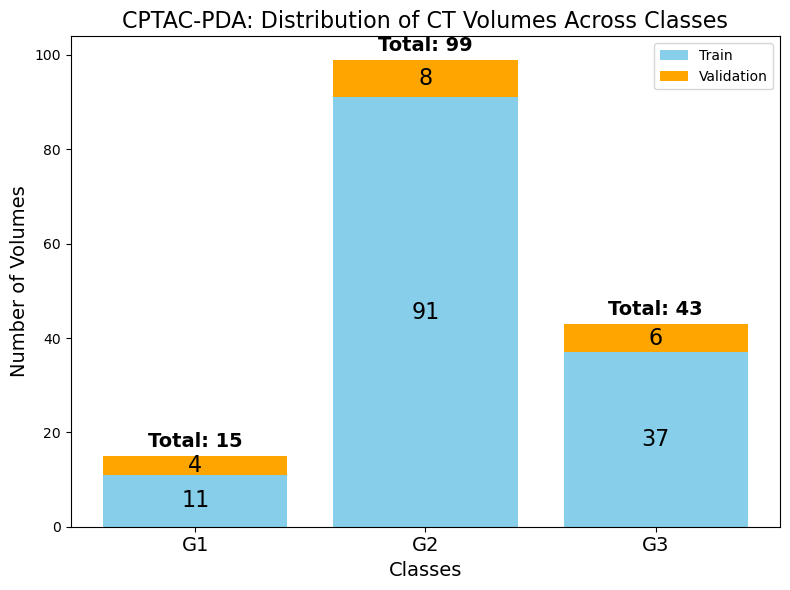

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classes = ['G1', 'G2', 'G3']
train_volumes = [11, 91, 37]
val_volumes = [4, 8, 6]

# Bar positions
x = np.arange(len(classes))

# Plot configuration
fig, ax = plt.subplots(figsize=(8, 6))

# Stacked bars
bars_train = ax.bar(x, train_volumes, label='Train', color='skyblue')
bars_val = ax.bar(x, val_volumes, bottom=train_volumes, label='Validation', color='orange')

# Add labels and title
ax.set_xlabel('Classes', fontsize=14)
ax.set_ylabel('Number of Volumes', fontsize=14)
ax.set_title('CPTAC-PDA: Distribution of CT Volumes Across Classes', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classes, fontsize=14)
ax.legend()

# Annotate values on bars
for i in range(len(x)):
    # Annotate train
    ax.text(x[i], train_volumes[i] / 2, str(train_volumes[i]), ha='center', va='center', color='black', fontsize=16)
    # Annotate validation
    ax.text(x[i], train_volumes[i] + val_volumes[i] / 2, str(val_volumes[i]), ha='center', va='center', color='black', fontsize=16)

# Annotate total volumes
for i, total in enumerate(np.array(train_volumes) + np.array(val_volumes)):
    ax.text(x[i], total + 1, f"Total: {total}", ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classes = ['G1', 'G2', 'G3']
train_volumes = [29, 138, 56]
val_volumes = [14, 24, 14]

# Bar positions
x = np.arange(len(classes))

# Plot configuration
fig, ax = plt.subplots(figsize=(8, 6))

# Stacked bars
bars_train = ax.bar(x, train_volumes, label='Train', color='skyblue')
bars_val = ax.bar(x, val_volumes, bottom=train_volumes, label='Validation', color='orange')

# Add labels and title
ax.set_xlabel('Classes', fontsize=14)
ax.set_ylabel('Number of Volumes', fontsize=14)
ax.set_title('CPTAC-UCEC: Distribution of CT Volumes Across Classes', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(classes, fontsize=14)
ax.legend()

# Annotate values on bars
for i in range(len(x)):
    # Annotate train
    ax.text(x[i], train_volumes[i] / 2, str(train_volumes[i]), ha='center', va='center', color='black', fontsize=16)
    # Annotate validation
    ax.text(x[i], train_volumes[i] + val_volumes[i] / 2, str(val_volumes[i]), ha='center', va='center', color='black', fontsize=16)

# Annotate total volumes
for i, total in enumerate(np.array(train_volumes) + np.array(val_volumes)):
    ax.text(x[i], total + 1, f"Total: {total}", ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
